# CS 315 Project #1: Data Visualization (*Group 2*)

**Section 01 - Group 2 Data Visualization Code**

**Written**: Wednesday, February 14, 2024

<a id="sec1"></a>
## 1. Loading in our data

We will load into pandas our data for all data collection runs. Our raw data has been previously cleaned and concatenated together.

Our dataset has the following columns:
- **batchID**: *string* concatenation of "user, "run", "batch", "index"
- **run**: *int* representing 1-5 runs that webdriver preformed
- **batch**: *int* representing batch 1-5 for each individual run
- **index**: *int* representing index value of video per batch
- **saved**: *boolean* True if video was saved, False otherwise
- **author**: *string* representation of video's creator
- **likes**: *int* number of likes
- **comments**: *int* number of comments
- **shares**: *int* number of shares
- **saves**: *int* number of saves
- **music**: *string* representation of sound used in video
- **hashtags**: *list* of hashtags used in video


***NOTE: Change/Update file paths!***

In [1]:
# import all libraries we will need in order to run this notebook
import os, csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import urllib

/var/folders/nd/my_j6y6s0p544s5nzvtvnntm0000gn/T/ipykernel_94470/3799045707.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


##### Using os we are finding the file path for our data and loading it into a new pandas dataframe.

In [2]:
# Loading in our data
df = pd.read_csv("/Users/fridahntika/Documents/CS315/CS315_Project1/data/master_updated.csv")
df

,batchID,run,batch,index,saved,author,likes,comments,shares,saves,music,hashtags
0,fn_activ_1_1_0,1,1,0,False,ina.katherine,3400000,30200,226400,94800,original sound - ina,NaN
1,fn_activ_1_1_1,1,1,1,False,leci.bby,280200,627,15500,164,original sound - fr0sty_rick,"['fyp%E3%82%B7', 'relatable', 'trending', 'ayl..."
2,fn_activ_1_1_2,1,1,2,False,kassieemariee,689400,2198,73600,6060,original sound - Taj.Mahal,NaN
3,fn_activ_1_1_3,1,1,3,False,caseynicolaxx,29500,107,855,62,Rock With It by Saucy Santana - Saucy Santana,"['fyp', 'foryou', 'foryoupage', 'caseynicola',..."
4,fn_activ_1_1_4,1,1,4,False,jailyneojeda,439800,1313,30800,965,original sound - Jailyne Ojeda,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8460,ep_cntrl_24_5_19,24,5,19,False,quedivertidotv1,7912,21,362,10,sonido original - Qué Divertido Tv,NaN
8461,ep_cntrl_24_5_20,24,5,20,False,familiapinaoficiial,228200,1110,14700,774,som original - Família.Pina.Oficial,NaN
8462,ep_cntrl_24_5_21,24,5,21,False,itssanya.1,124100,576,10700,109,original sound - Sanya,['@ucoolmediylashes']
8463,ep_cntrl_24_5_22,24,5,22,False,nayelilovera_,46300,662,6843,94,Love songs - ⭐️,"['fyp%E3%82%B7', 'trending', 'fyp', 'foryoupag..."


<a id="sec2"></a>
## 2. Analyzing our data

## **plot_metric_member Part 1**

Creates data frames for one person's control and active account and plots the mean for each run. 

Each plot is saved in folder named "*visualizations*".

##### **Parameters**:
- **Metric**: *str*, represents one of the following metrics of TikTok's popularity: likes, comments, shares, saves (only acceptable inputs)
- **Initial**: *str*, should represent one of six group members: ep, dl, lg, fg, fn, ss (only acceptable inputs)

In [3]:
def plot_metric_member(metric, initial, df):
    '''
    Creates data frames for one person's control and active account and plots the mean for each run.

    Parameters:
        Metric: str, represents one of the following metrics of TikTok's popularity: likes, comments, shares, saves (only acceptable inputs)
        Initial: str, should represent one of six group members: ep, dl, lg, fg, fn, ss (only acceptable inputs)
    '''
    df_activ = df[df['batchID'].str.contains(f'{initial}_activ')]
    df_cntrl = df[df['batchID'].str.contains(f'{initial}_cntrl')]
    
    # Get descriptive statistic for df by index -- assuming 25 runs
    df_activ_group = df_activ.groupby('run')[[metric]].median()
    df_cntrl_group = df_cntrl.groupby('run')[[metric]].median()

    # Graph the average of the chosen metric for both control and active accounts over 25 runs
    sns.set_style('whitegrid')

    sns.scatterplot(x='run',y=metric,data=df_activ_group,color='blue')
    sns.lineplot(x='run',y=metric,data=df_activ_group,color = 'lightblue')

    sns.scatterplot(x='run',y=metric,data=df_cntrl_group,color='green')
    sns.lineplot(x='run',y=metric,data=df_cntrl_group,color = 'lightgreen')
    
        
        #plt.gca().set_yticklabels(['{:.0f}k'.format(x/1000) for x in plt.gca().get_yticks()])
        
    plt.title(f'Median {metric} for {initial} for Active and Control Groups')
    plt.xlabel('Run Number')

    plt.show()

##### Now we will run **plot_metric_member** once for each member (ep, dl, lg, fg, fn, ss).

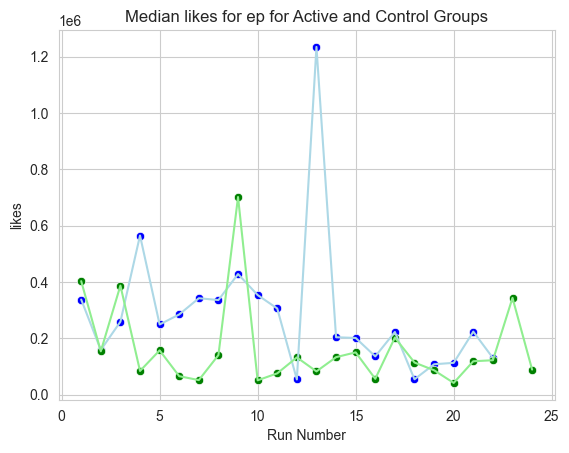

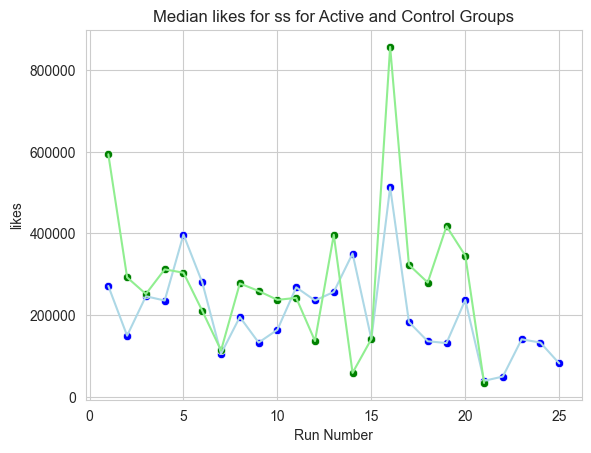

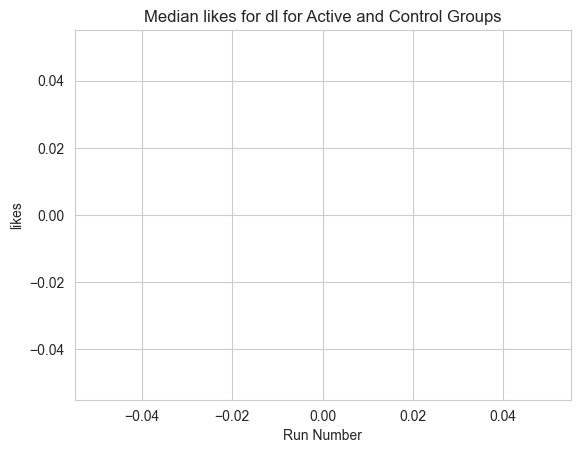

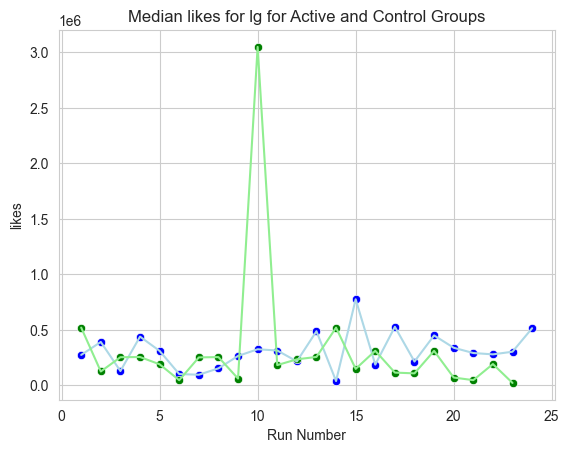

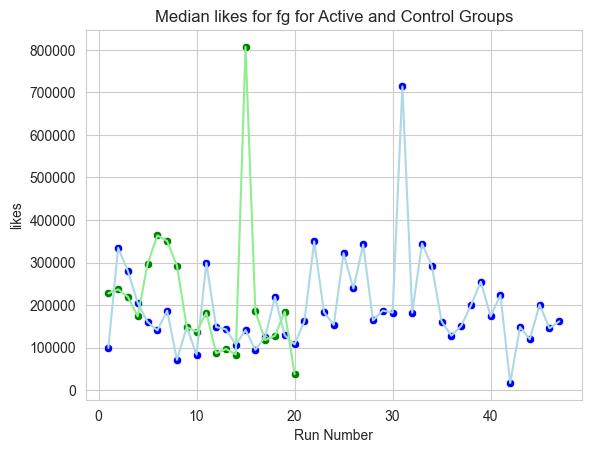

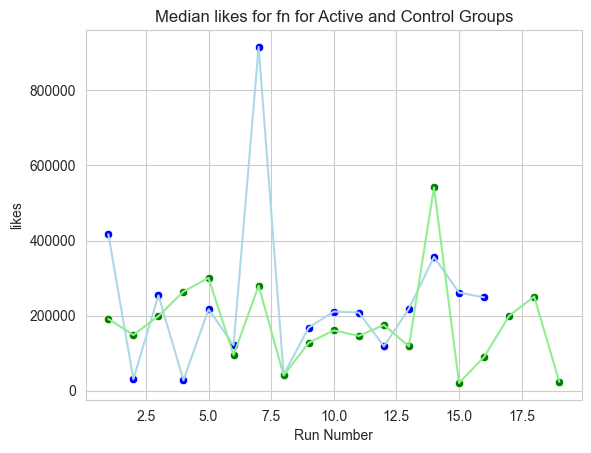

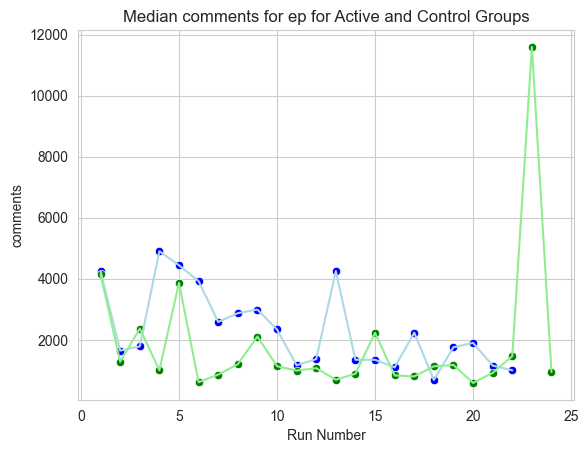

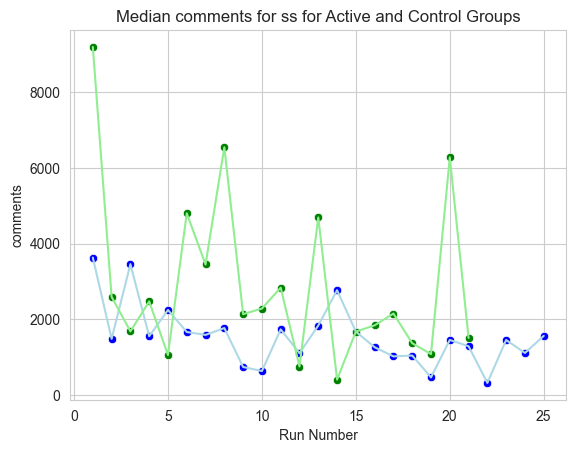

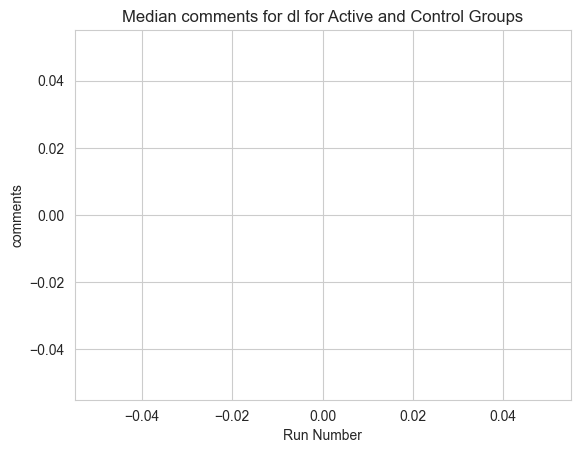

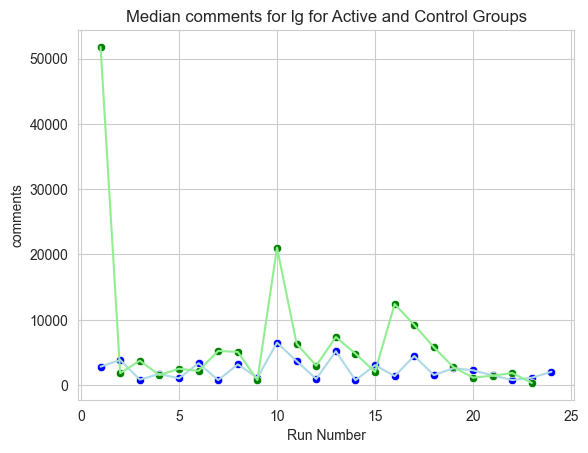

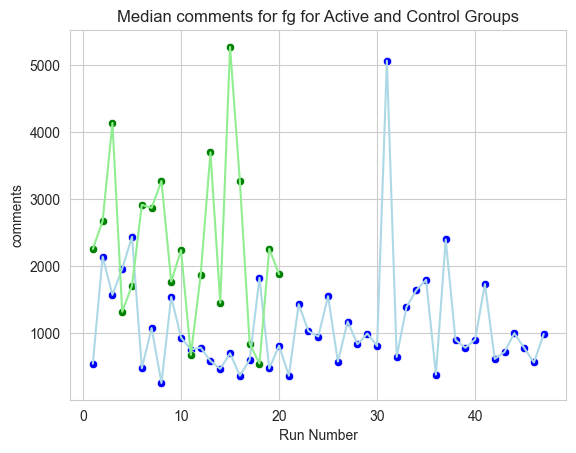

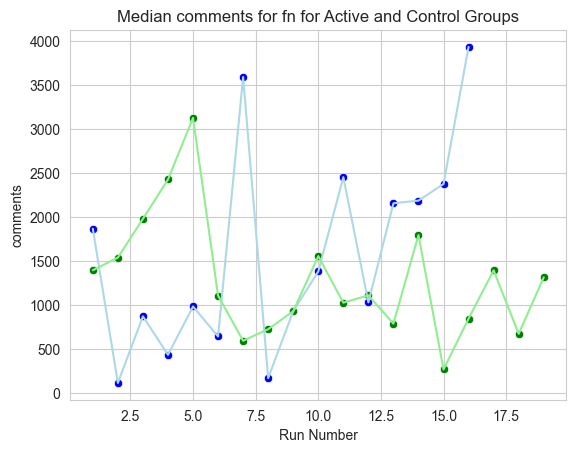

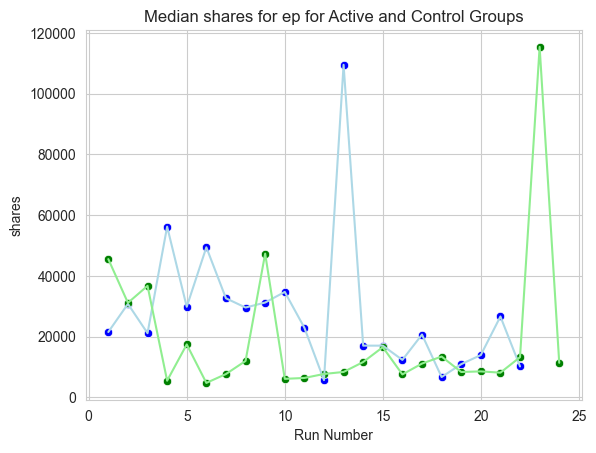

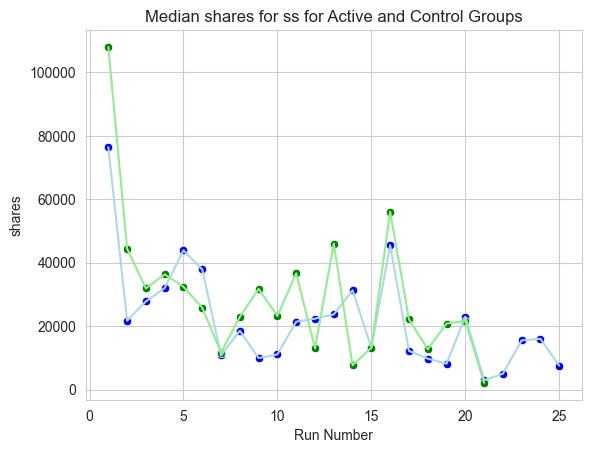

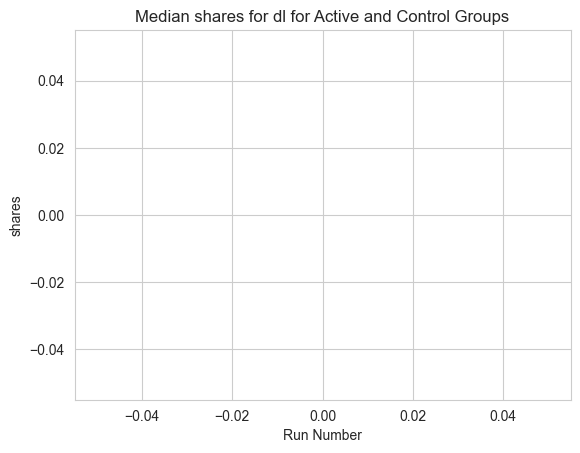

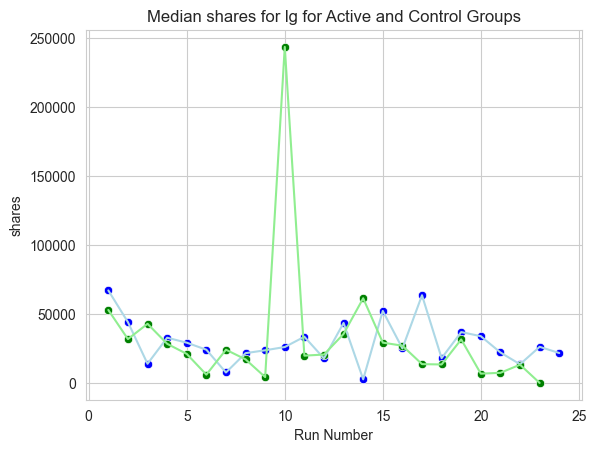

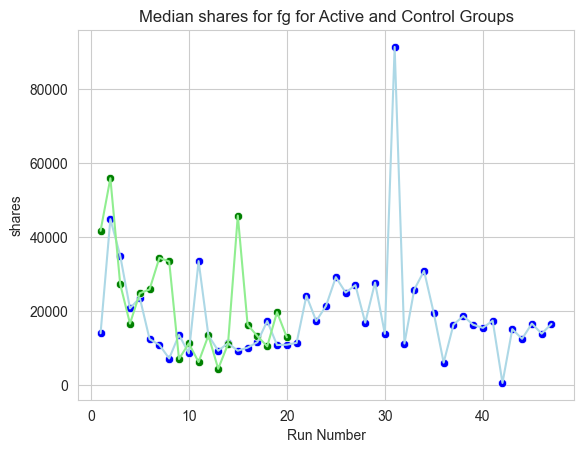

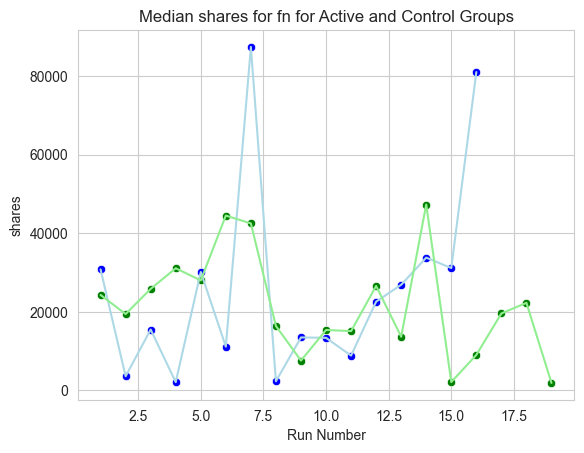

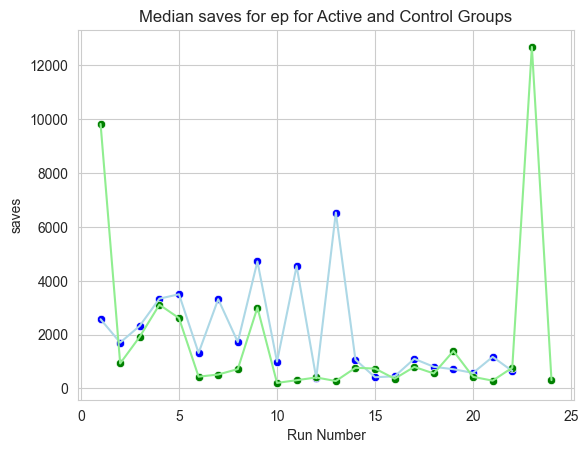

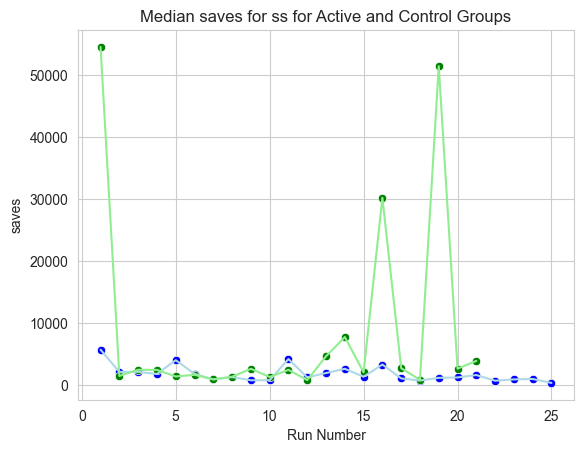

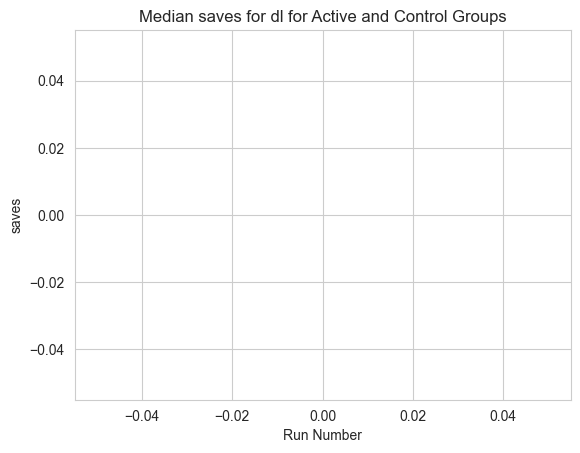

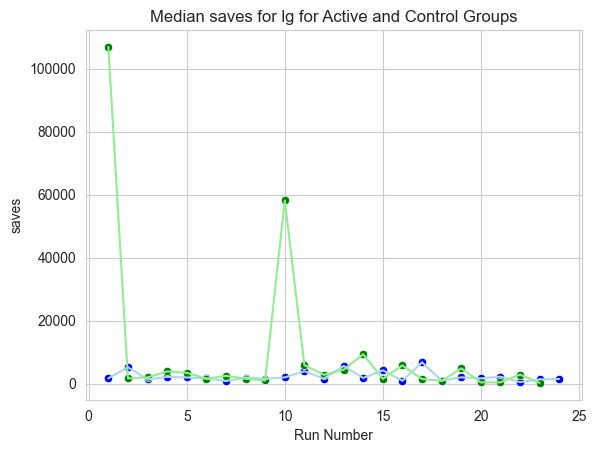

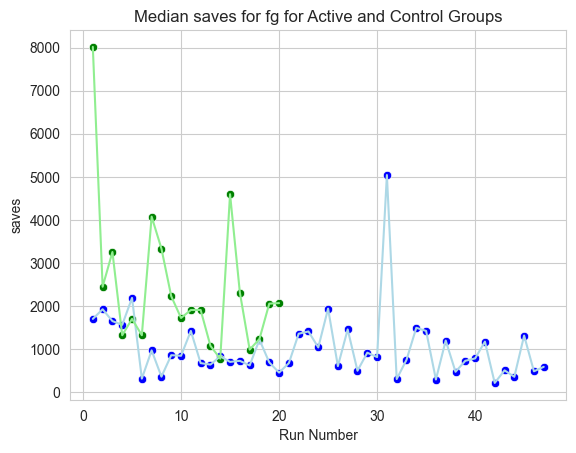

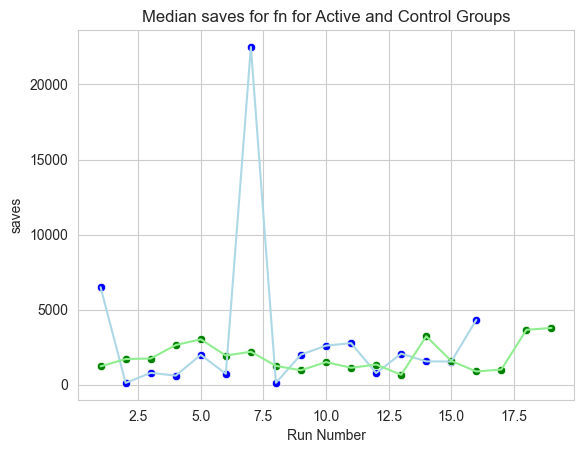

In [4]:
members = ["ep", "ss", "dl", "lg", "fg", "fn"]
metrics = ["likes", "comments", "shares", "saves"]

for metric in metrics:
    for member in members:
        plot_metric_member(metric,member,df)

## **plot_metric_member Part 2**

Creates data frames for one person's control and active account and plots the mean for each run. This code adds in a legend and changes colors to the previously made plots

Each plot is saved in folder named "*visualizations*".

##### **Parameters**:
- **Metric**: *str*, represents one of the following metrics of TikTok's popularity: likes, comments, shares, saves (only acceptable inputs)
- **Initial**: *str*, should represent one of six group members: ep, dl, lg, fg, fn, ss (only acceptable inputs)

In [5]:
df["group"] = ["active" if "activ" in row else 'control' for row in df['batchID']]
df

,batchID,run,batch,index,saved,author,likes,comments,shares,saves,music,hashtags,group
0,fn_activ_1_1_0,1,1,0,False,ina.katherine,3400000,30200,226400,94800,original sound - ina,NaN,active
1,fn_activ_1_1_1,1,1,1,False,leci.bby,280200,627,15500,164,original sound - fr0sty_rick,"['fyp%E3%82%B7', 'relatable', 'trending', 'ayl...",active
2,fn_activ_1_1_2,1,1,2,False,kassieemariee,689400,2198,73600,6060,original sound - Taj.Mahal,NaN,active
3,fn_activ_1_1_3,1,1,3,False,caseynicolaxx,29500,107,855,62,Rock With It by Saucy Santana - Saucy Santana,"['fyp', 'foryou', 'foryoupage', 'caseynicola',...",active
4,fn_activ_1_1_4,1,1,4,False,jailyneojeda,439800,1313,30800,965,original sound - Jailyne Ojeda,NaN,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,ep_cntrl_24_5_19,24,5,19,False,quedivertidotv1,7912,21,362,10,sonido original - Qué Divertido Tv,NaN,control
8461,ep_cntrl_24_5_20,24,5,20,False,familiapinaoficiial,228200,1110,14700,774,som original - Família.Pina.Oficial,NaN,control
8462,ep_cntrl_24_5_21,24,5,21,False,itssanya.1,124100,576,10700,109,original sound - Sanya,['@ucoolmediylashes'],control
8463,ep_cntrl_24_5_22,24,5,22,False,nayelilovera_,46300,662,6843,94,Love songs - ⭐️,"['fyp%E3%82%B7', 'trending', 'fyp', 'foryoupag...",control


In [6]:
# For each team member, create a separate dataframe containing their active data
ep_activ = df[df['batchID'].str.contains('ep_activ')]
ss_activ = df[df['batchID'].str.contains('ss_activ')]
fg_activ = df[df['batchID'].str.contains('fg_activ')]
fn_activ = df[df['batchID'].str.contains('fn_activ')]
lg_activ = df[df['batchID'].str.contains('lg_activ')]
dl_activ = df[df['batchID'].str.contains('Dl_activ')]

In [7]:
# For each team member, create a separate dataframe containing their control data
ep_cntrl = df[df['batchID'].str.contains('ep_cntrl')]
ss_cntrl = df[df['batchID'].str.contains('ss_cntrl')]
fg_cntrl = df[df['batchID'].str.contains('fg_cntrl')]
fn_cntrl = df[df['batchID'].str.contains('fn_cntrl')]
lg_cntrl = df[df['batchID'].str.contains('lg_cntrl')]
dl_cntrl = df[df['batchID'].str.contains('Dl_cntrl')]
dl_cntrl

,batchID,run,batch,index,saved,author,likes,comments,shares,saves,music,hashtags,group
6224,Dl_cntrl_1_1_0,1,1,0,False,didiios,162500,57800,14300,70500,original sound - Didios,"['random', 'facts']",control
6225,Dl_cntrl_1_1_1,1,1,1,False,ellielobio,224900,425,19900,602,original sound - divin,NaN,control
6226,Dl_cntrl_1_1_2,1,1,2,False,.edits_tikfp,95100,1491,44800,404,original sound - ren ( fan acc ),"['capcut', '@ptsmash', '@okdunkz', '@hubxmango...",control
6227,Dl_cntrl_1_1_3,1,1,3,False,nhlfreesaucegod,272800,1632,89200,4354,original sound - Kenayo Frederick,"['fyp', 'fu', 'freesaucegod', 'highlightertuto...",control
6228,Dl_cntrl_1_1_4,1,1,4,False,breckiehill,73400,1120,81700,755,som original - lalarinha,NaN,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6798,Dl_cntrl_25_5_23,25,5,23,False,kermaniz,424100,4502,34700,6064,barb heaven - kevzilla,"['fyp', 'cutebaby', 'toddleroutfitideas', 'tod...",control
6799,Dl_cntrl_25_5_24,25,5,24,False,projectbabykb,1500000,4428,137600,6473,original sound - Steve,NaN,control
6800,Dl_cntrl_25_5_25,25,5,25,False,paige..rywolt,591700,2584,49700,3714,original sound - zivsoundz,"['@totally.not.angelina316', 'fyp']",control
6801,Dl_cntrl_25_5_26,25,5,26,False,gus_ahr69,199700,1635,18500,6244,original sound - Gus Ahr,"['foryou', 'viral', 'fyp', 'motivation', 'quot...",control


##### We will concatenate each users two datasets to form one dataframe per memeber.

In [8]:
ep = pd.concat([ep_cntrl,ep_activ])
ss = pd.concat([ss_cntrl,ss_activ])
fg = pd.concat([fg_cntrl,fg_activ])
fn = pd.concat([fn_cntrl,fn_activ])
lg = pd.concat([lg_cntrl,lg_activ])
dl = pd.concat([dl_cntrl,dl_activ])

In [11]:
def plot_metric_member(metric, initial, df):
    '''
    Creates data frames for one person's control and active account and plots the mean for each run.

    Parameters:
        Metric: str, represents one of the following metrics of TikTok's popularity: likes, comments, shares, saves (only acceptable inputs)
        Initial: str, should represent one of six group members: ep, dl, lg, fg, fn, ss (only acceptable inputs)
    '''
    sns.set_theme(style="whitegrid")
    fig = sns.lineplot(x="run", 
                       y= metric,
                       data=df, 
                       hue="group",
                       marker='o',
                       errorbar=None)

    plt.title(f'Median {metric} for {initial} for Active and Control Groups')
    plt.xlabel('Run Number')
    plt.legend(loc='upper left',title="Legend")

    #plt.savefig(f'/Users/fernandagonzalez/Desktop/school/CS 315/CS315_Project1/data_analysis/vizualizations/{initial}_{metric}.png', bbox_inches='tight')
    plt.show()

##### Now we will run **plot_metric_member** once for each member (ep, dl, lg, fg, fn, ss).

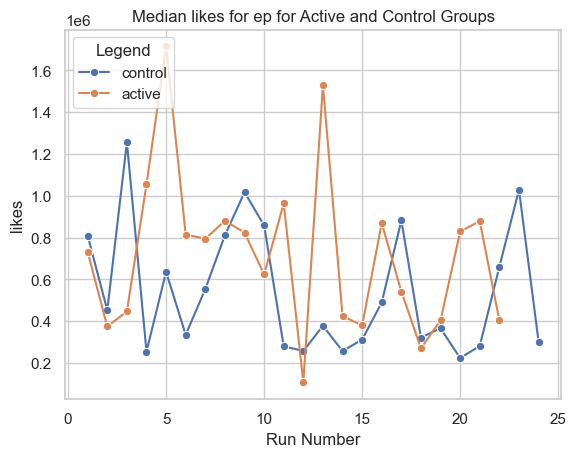

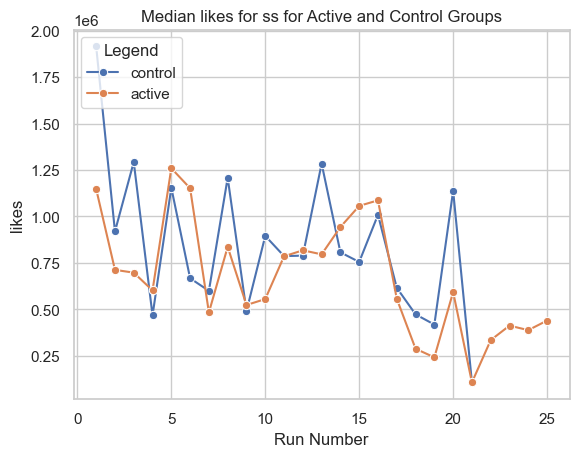

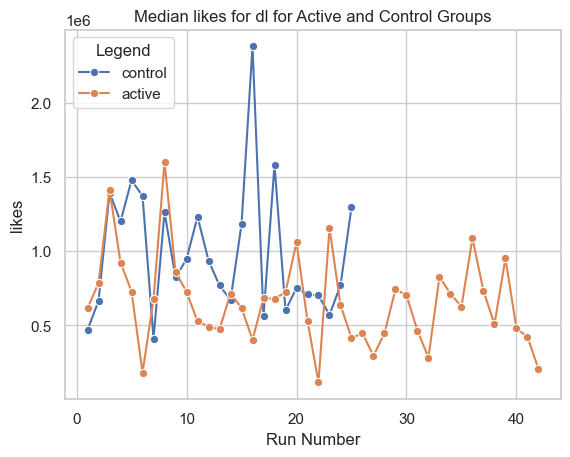

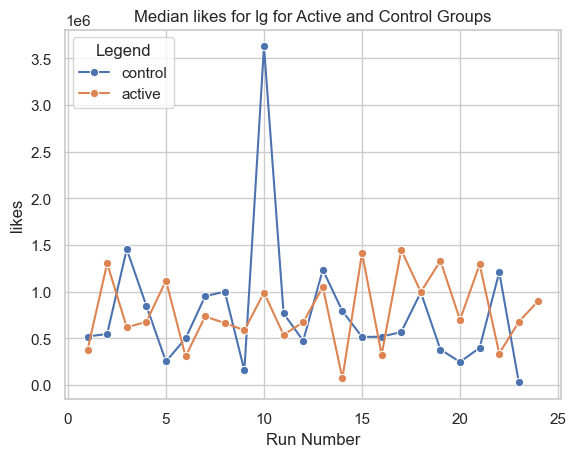

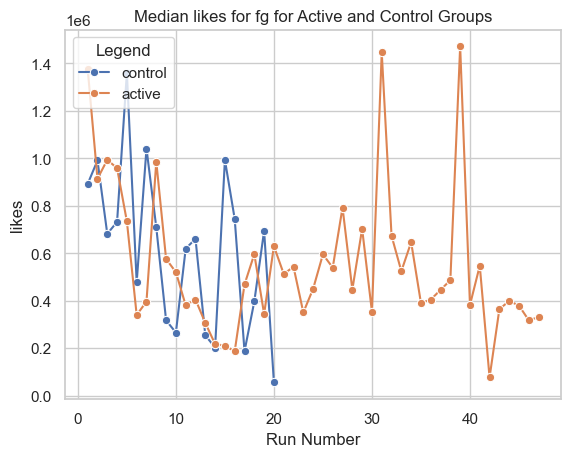

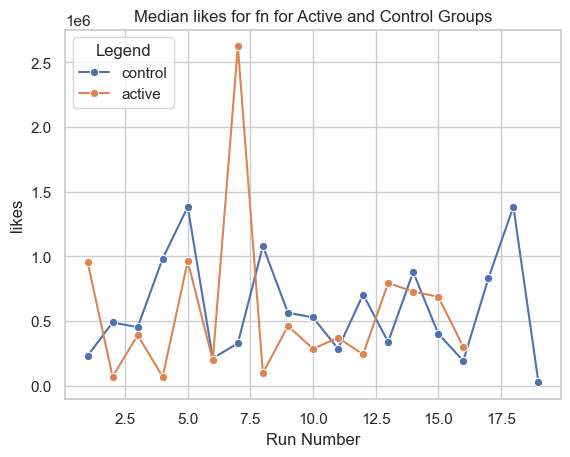

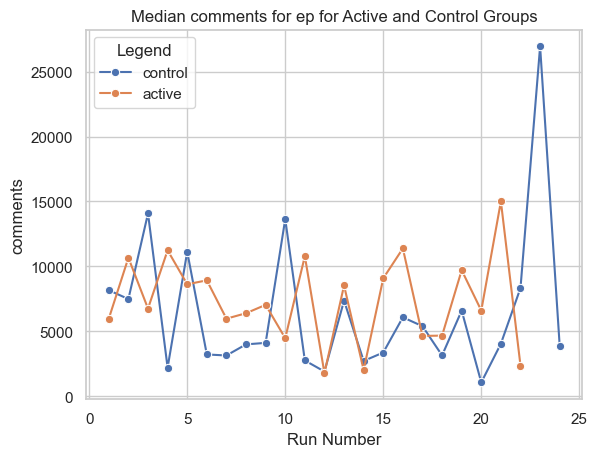

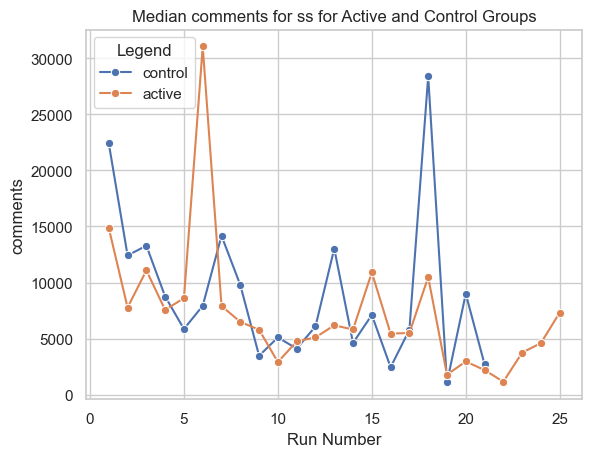

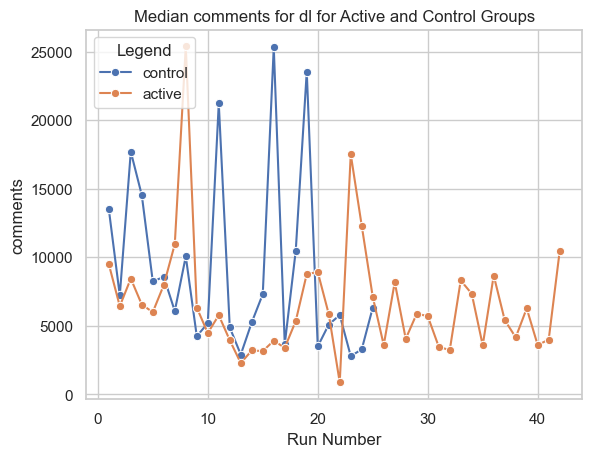

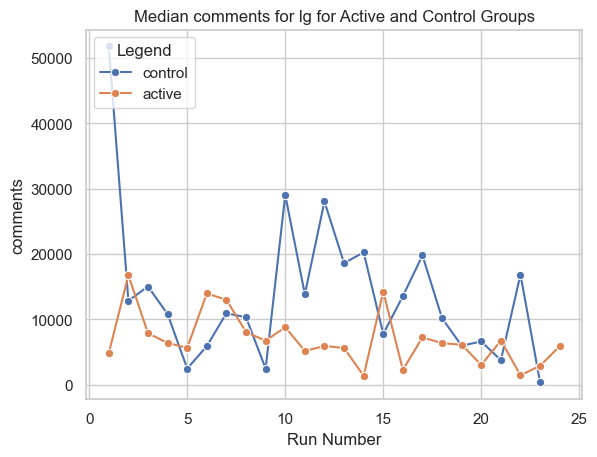

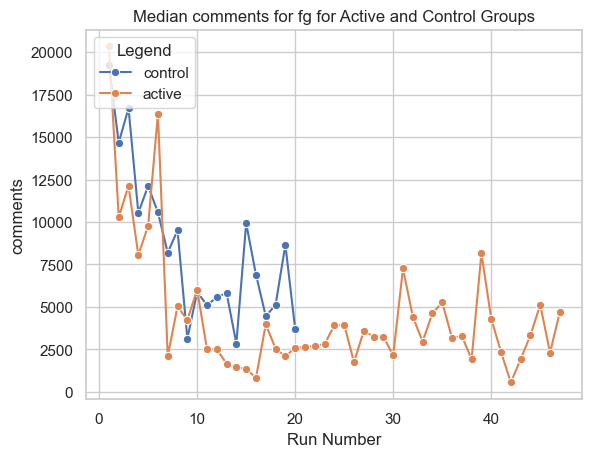

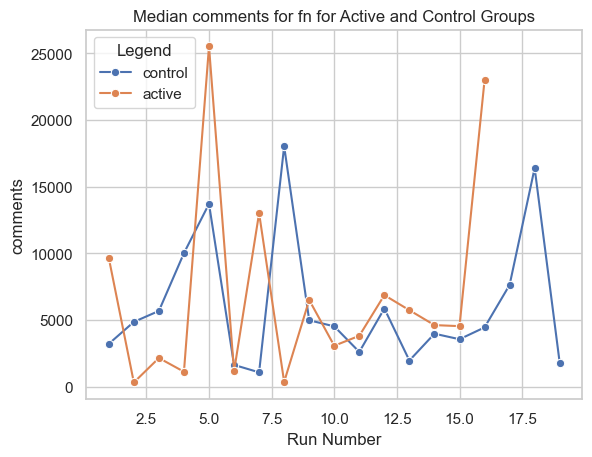

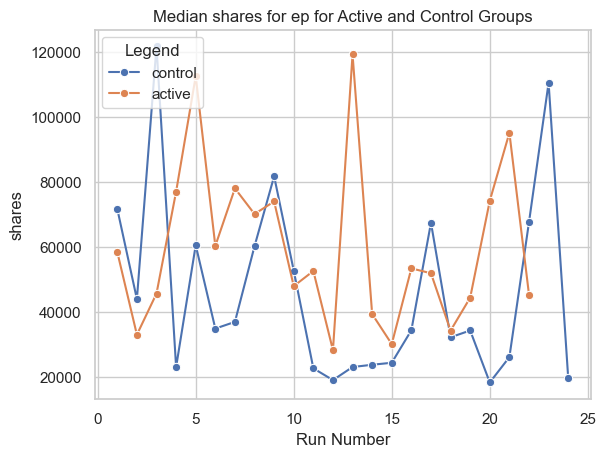

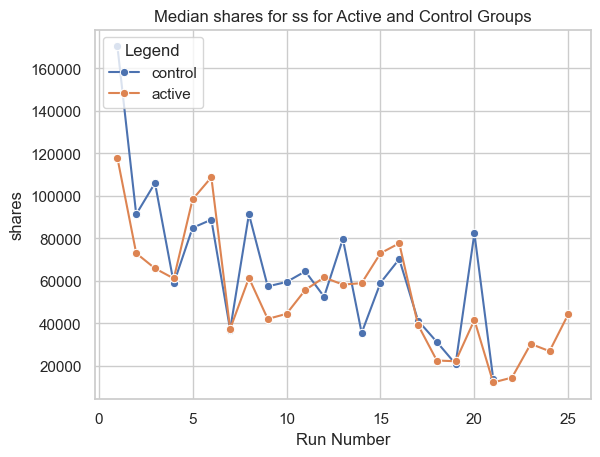

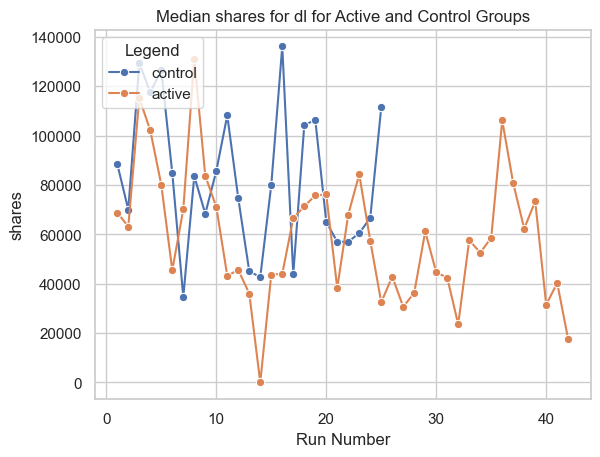

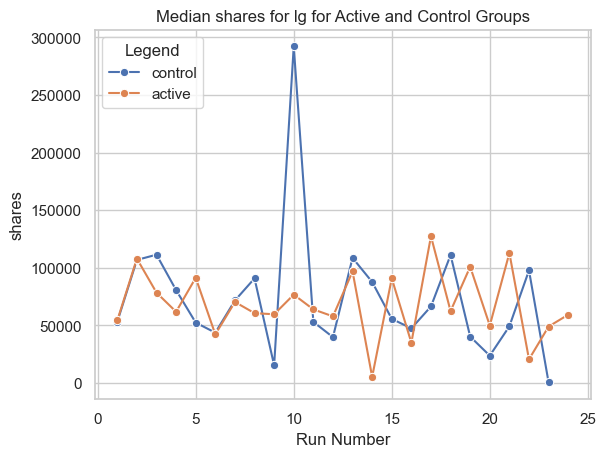

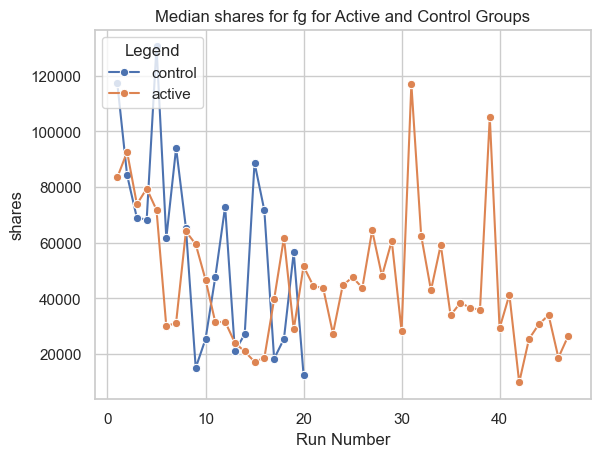

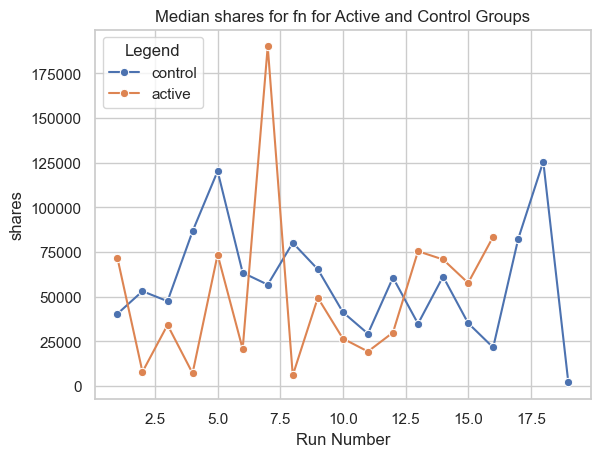

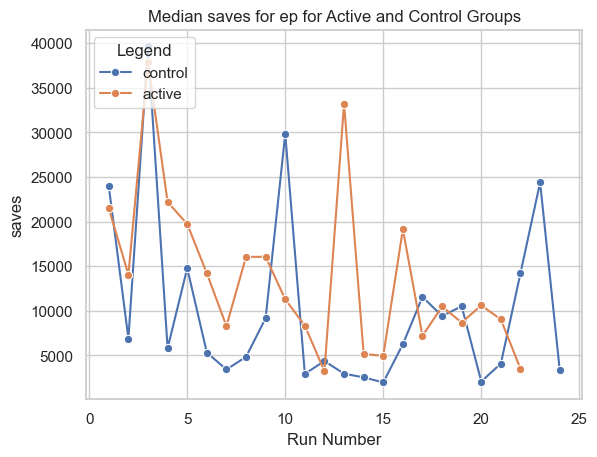

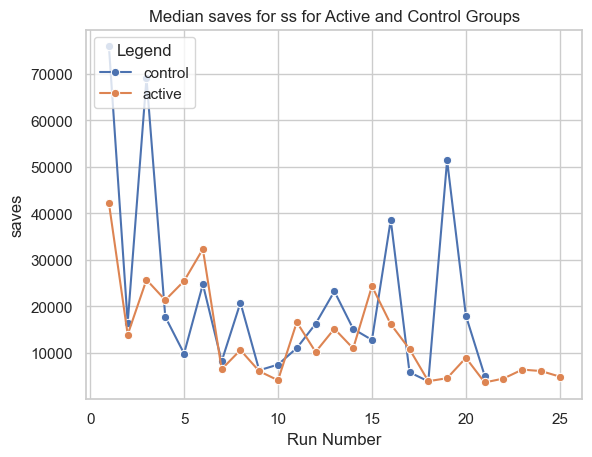

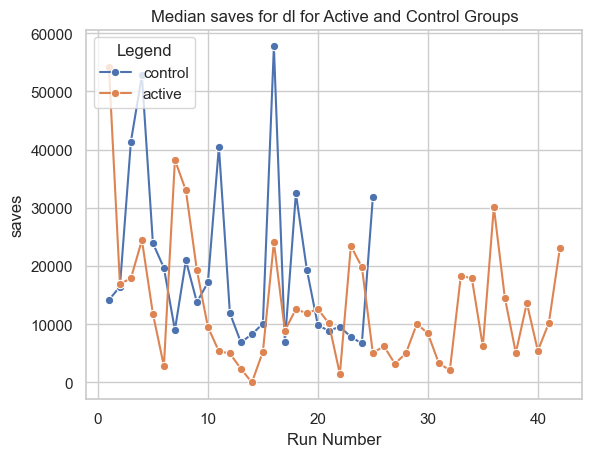

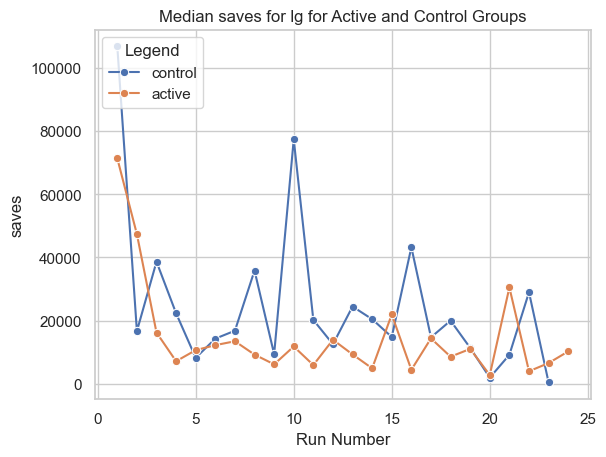

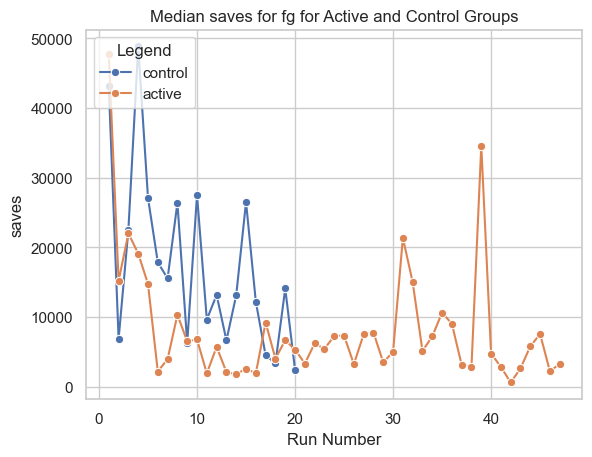

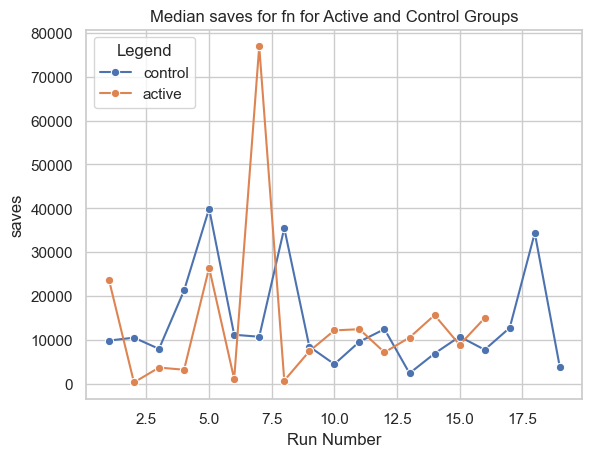

In [12]:
dfs = [ep, ss, dl, lg, fg, fn]
initials = ['ep', 'ss', 'dl', 'lg', 'fg', 'fn']
metrics = ["likes", "comments", "shares", "saves"]

for metric in metrics:
    for i in range(len(dfs)):
        plot_metric_member(metric, initials[i], dfs[i])

## **countAllHashtags**

Takes a string or a NaN value. Splits the srings to find hashtags, updates a Counter object (*a global variable*) to keep track of all hashtags.

##### The following code collects frequency for all hashtags.

In [13]:
cnt = Counter()
def countAllHashtags(cell):
    """
    Takes a string or a NaN value. Splits the srings to find hashtags, updates a Counter object
    (a global variable) to keep track of all hashtags.
    """
    if type(cell) == str: # avoid NaN values, which are float
        htList = [el.strip() for el in cell.split(',')] # prepare individual hashtags
        cnt.update(htList) # method update of Counter takes a list and updates all keys
_ = df['hashtags'].apply(countAllHashtags)
all_hashtagfreq = cnt.most_common(25)
all_hashtagfreq

[("'fyp'", 1173),
 ("['fyp'", 987),
 ("'viral'", 768),
 ("'foryou'", 704),
 ("'fyp%E3%82%B7'", 453),
 ("'foryoupage'", 380),
 ("'fyp']", 367),
 ("'funny'", 294),
 ("'trending'", 272),
 ("'fyp%E3%82%B7%E3%82%9Aviral'", 226),
 ("'relatable'", 174),
 ("['foryou'", 174),
 ("'viralvideo'", 163),
 ("'viral']", 162),
 ("['fyp%E3%82%B7'", 161),
 ("'tiktok'", 158),
 ("['fyp']", 156),
 ("'couple'", 140),
 ("'foryou']", 137),
 ("'fy'", 123),
 ("'trend'", 117),
 ("'dance'", 99),
 ("'foryoupage']", 97),
 ("['viral'", 96),
 ("'blowthisup'", 94)]

##### The following code collects frequency for all hashtags shown in **control** accounts.

In [14]:
control = pd.concat([ep_cntrl,ss_cntrl,fg_cntrl,lg_cntrl,dl_cntrl])
controlCnt = Counter()
def countAllHashtags(cell):
    """
    Takes a string or a NaN value. Splits the srings to find hashtags, updates a Counter object
    (a global variable) to keep track of all hashtags.
    """
    if type(cell) == str: # avoid NaN values, which are float
        htList = [el.strip() for el in cell.split(',')] # prepare individual hashtags
        controlCnt.update(htList) # method update of Counter takes a list and updates all keys
        
_ = control['hashtags'].apply(countAllHashtags)
control_hashtagfreq = controlCnt.most_common(25)
control_hashtagfreq

[("'fyp'", 317),
 ("['fyp'", 240),
 ("'viral'", 213),
 ("'foryou'", 183),
 ("'fyp%E3%82%B7'", 142),
 ("'foryoupage'", 125),
 ("'fyp']", 93),
 ("'funny'", 82),
 ("'trending'", 70),
 ("'fyp%E3%82%B7%E3%82%9Aviral'", 67),
 ("'viralvideo'", 60),
 ("['foryou'", 43),
 ("'tiktok'", 43),
 ("'fy'", 43),
 ("'viral']", 38),
 ("['fyp%E3%82%B7'", 38),
 ("'fypage'", 36),
 ("'foryou']", 33),
 ("'therian'", 31),
 ("'fyppppppppppppppppppppppp'", 31),
 ("'relatable'", 31),
 ("'couple'", 31),
 ("'therianthropy'", 28),
 ("['viral'", 28),
 ("['fyp']", 28)]

##### The following code collects frequency for all hashtags shown in **active** accounts.

In [15]:
active = pd.concat([ep_activ,ss_activ,fg_activ,lg_activ,dl_activ])
activeCnt = Counter()
def countAllHashtags(cell):
    """
    Takes a string or a NaN value. Splits the srings to find hashtags, updates a Counter object
    (a global variable) to keep track of all hashtags.
    """
    if type(cell) == str: # avoid NaN values, which are float
        htList = [el.strip() for el in cell.split(',')] # prepare individual hashtags
        activeCnt.update(htList) # method update of Counter takes a list and updates all keys
        
_ = active['hashtags'].apply(countAllHashtags)
active_hashtagfreq = controlCnt.most_common(25)
active_hashtagfreq

[("'fyp'", 317),
 ("['fyp'", 240),
 ("'viral'", 213),
 ("'foryou'", 183),
 ("'fyp%E3%82%B7'", 142),
 ("'foryoupage'", 125),
 ("'fyp']", 93),
 ("'funny'", 82),
 ("'trending'", 70),
 ("'fyp%E3%82%B7%E3%82%9Aviral'", 67),
 ("'viralvideo'", 60),
 ("['foryou'", 43),
 ("'tiktok'", 43),
 ("'fy'", 43),
 ("'viral']", 38),
 ("['fyp%E3%82%B7'", 38),
 ("'fypage'", 36),
 ("'foryou']", 33),
 ("'therian'", 31),
 ("'fyppppppppppppppppppppppp'", 31),
 ("'relatable'", 31),
 ("'couple'", 31),
 ("'therianthropy'", 28),
 ("['viral'", 28),
 ("['fyp']", 28)]

##### Cleaning the hashtag list and turning it into a dataframe.

In [16]:
delete = ['fyp', 'foryou', 'fy', 'fypage', 'foryoupage', 'viral','trending','tiktok']
def clean_hashtag(hashfreq):
    """
    Clean the hashtag list and turn it into a dataframe
    """
    hashtags = []
    freqs = []
    for hashtag, freq in hashfreq:
        #change the hashtag into readable format
        if '%' in hashtag:
            hashtag = urllib.parse.unquote(hashtag)
        #reformat the hashtags
        hashtag = hashtag.replace("'","")
        hashtag = hashtag.replace("[","")
        hashtag = hashtag.replace("]","")
        #check if we want the hashtag
        if (hashtag not in delete) and ('fyp' not in hashtag):
            hashtags.append(hashtag)
            freqs.append(freq)
    #generate dataframe
    df = pd.DataFrame()
    df["hashtag"] = hashtags
    df["freq"] = freqs
    return df

##### Creating a bargraph representation of frequency.

In [26]:
  def get_hashfreq_bar(df, group):
    """
    Takes in a dataframe as an input and generate a bar graph 
    """
    plt.bar(df["hashtag"],df["freq"], color ='lightseagreen', width = 0.4)
 
    plt.xlabel("Hashtags")
    plt.ylabel("No. of times the hashtage appears")
    plt.title(f"Frequencies of Hashtag for {group} group")

    #plt.savefig(f'/Users/fernandagonzalez/Desktop/school/CS 315/CS315_Project1/data_analysis/vizualizations/{group}_bargraph.png', bbox_inches='tight')
    plt.show()

##### Creating a piechart representation of frequency.

In [27]:
def get_hashfreq_pie(df, group):
    """
    Takes in a dataframe as an input and generate a pie chart 
    """
    df["percent"] = (df['freq']/df['freq'].sum())*100
    y = df["freq"]
    mylabels = df["hashtag"]

    plt.pie(y, labels = mylabels)
    plt.title(f"Frequencies of Hashtag for {group} group")

    #plt.savefig(f'/Users/fernandagonzalez/Desktop/school/CS 315/CS315_Project1/data_analysis/vizualizations/{group}_piechart.png', bbox_inches='tight')
    plt.show() 

##### Cleaning hashtags for **all**, **active**, and **control**.

In [28]:
df_all = clean_hashtag(all_hashtagfreq)
df_active = clean_hashtag(active_hashtagfreq)
df_control = clean_hashtag(control_hashtagfreq)

##### Creating a bargraph representation of frequency for **all**.

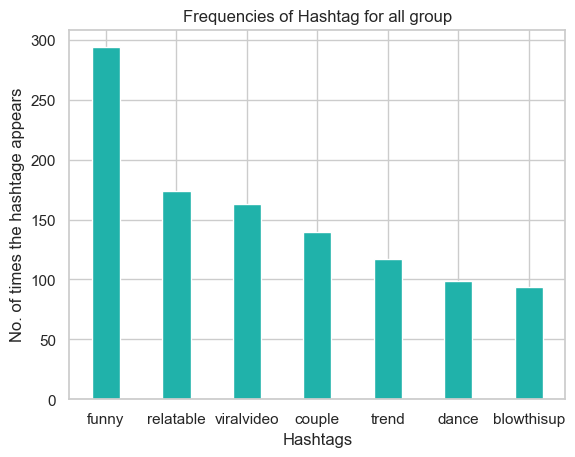

In [29]:
get_hashfreq_bar(df_all, 'all')

##### Creating a piechart representation of frequency for **active**.

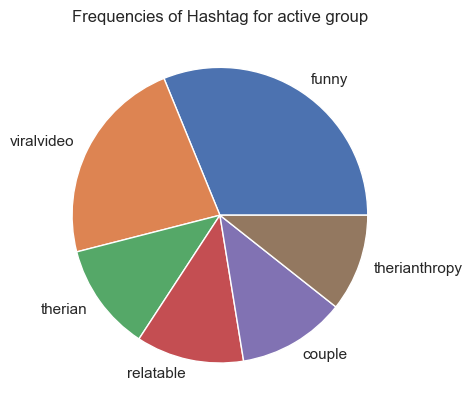

In [30]:
get_hashfreq_pie(df_active, 'active')

##### Creating a piechart representation of frequency of **control**.

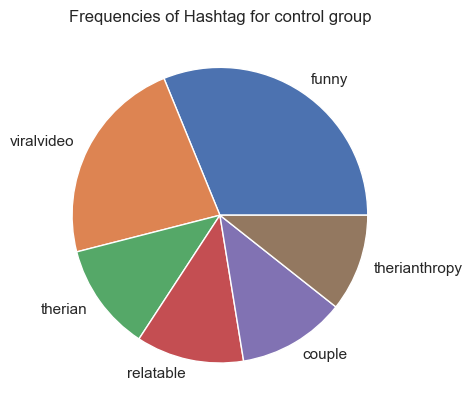

In [31]:
get_hashfreq_pie(df_control, 'control')

## **plot_differences**

## Jaccard Indices

In [32]:
def createPostID(row):
    return f"{row['author']}_{row['saves']}"

df['postID'] = df.apply(createPostID, axis=1)
df.head()

,batchID,run,batch,index,saved,author,likes,comments,shares,saves,music,hashtags,group,postID
0,fn_activ_1_1_0,1,1,0,False,ina.katherine,3400000,30200,226400,94800,original sound - ina,NaN,active,ina.katherine_94800
1,fn_activ_1_1_1,1,1,1,False,leci.bby,280200,627,15500,164,original sound - fr0sty_rick,"['fyp%E3%82%B7', 'relatable', 'trending', 'ayl...",active,leci.bby_164
2,fn_activ_1_1_2,1,1,2,False,kassieemariee,689400,2198,73600,6060,original sound - Taj.Mahal,NaN,active,kassieemariee_6060
3,fn_activ_1_1_3,1,1,3,False,caseynicolaxx,29500,107,855,62,Rock With It by Saucy Santana - Saucy Santana,"['fyp', 'foryou', 'foryoupage', 'caseynicola',...",active,caseynicolaxx_62
4,fn_activ_1_1_4,1,1,4,False,jailyneojeda,439800,1313,30800,965,original sound - Jailyne Ojeda,NaN,active,jailyneojeda_965


In [33]:
# For each run, create a separate dataframe
run_1 = df[df['run'].isin([1,2,3,4,5])]
run_2 = df[df['run'].isin([6,7,8,9,10])]
run_3 = df[df['run'].isin([11,12,13,14,15])]
run_4 = df[df['run'].isin([16,17,18,19,20])]
run_5 = df[df['run'].isin([21,22,23,24,25])]

In [34]:
def jaccard_similarity(list1, list2):
    """
    Takes in two lists and calculates their similarities
    """
    intersection = len(list(set(list1).intersection(list2)))
    union = len(set(list1).union(list2))
    if union == 0:
        return ('error')
    return round(float((intersection) / union), 3)

In [35]:
def jaccard_by_metric(df):
    """
    Takes in the dataframe and calculates their jaccard similarities per scenario and metric
    """
    members = ["ep", "ss", "Dl", "lg", "fg", "fn"]
    metrics = ["author", "postID", "music"]

    new_dict = {}
    
    for metric in metrics:
        new_dict[metric] = {}
        for member in members:
            #get the jaccard index for each scenario
            df_activ = df[df['batchID'].str.contains(f'{member}_activ')]
            df_cntrl = df[df['batchID'].str.contains(f'{member}_cntrl')]

            df_activ_metric = df_activ[metric]
            df_control_metric = df_cntrl[metric]
            jaccard = jaccard_similarity(list(df_activ_metric), list(df_control_metric))
            new_dict[metric][member] = jaccard

    return new_dict

In [36]:
jaccard_by_run = {}
jaccard_by_run['run1'] = jaccard_by_metric(run_1)
jaccard_by_run['run2'] = jaccard_by_metric(run_2)
jaccard_by_run['run3'] = jaccard_by_metric(run_3)
jaccard_by_run['run4'] = jaccard_by_metric(run_4)
jaccard_by_run['run5'] = jaccard_by_metric(run_5)

In [37]:
#combines all the indices into one dataframe
jaccard_df = pd.DataFrame.from_dict({(i,j): jaccard_by_run[i][j] for i in jaccard_by_run.keys() for j in jaccard_by_run[i].keys()},
                       orient='index')

jaccard_df

ep     ss     Dl     lg     fg     fn
run1 author  0.122  0.339  0.011  0.222  0.142  0.024
     postID  0.081  0.323  0.000  0.138  0.095  0.011
     music   0.118  0.344  0.017  0.236  0.154  0.018
run2 author  0.073  0.301  0.059  0.086  0.065  0.013
     postID  0.044  0.287  0.017  0.048  0.024  0.006
     music   0.068  0.301  0.075  0.084  0.076   0.02
run3 author  0.032  0.284  0.060  0.030  0.041  0.022
     postID  0.015  0.269  0.023  0.014  0.017   0.01
     music   0.043  0.282  0.062  0.041  0.031  0.045
run4 author  0.038  0.225  0.025  0.046  0.049    0.0
     postID  0.022  0.208  0.000  0.021  0.009    0.0
     music   0.037  0.221  0.025  0.051  0.048    0.0
run5 author  0.039  0.036  0.034  0.029  0.000  error
     postID  0.015  0.056  0.005  0.019  0.000  error
     music   0.063  0.046  0.034  0.020  0.000  error

## top 5 content creators

In [40]:
def get_top_5(df):
    """
    Takes in the dataframe and generates pie charts for each scenario for both active and control bots
    """
    members = ["ep", "ss", "Dl", "lg", "fg", "fn"]

    for member in members:
        #creates dataframes for active and control bots for each scenario
        df_activ = df[df['batchID'].str.contains(f'{member}_activ')]
        df_cntrl = df[df['batchID'].str.contains(f'{member}_cntrl')]

        #gets the top 5 authors and counts for both users
        cntrl_authors = list(df_cntrl['author'])
        cntrl_author_list = Counter(cntrl_authors).most_common(5)

        control_authors = []
        control_counts = []
        for auth in cntrl_author_list:
            control_authors.append(auth[0])
            control_counts.append(auth[1])

        activ_authors = list(df_activ['author'])
        activ_author_list = Counter(activ_authors).most_common(5)
        
        activ_authors = []
        activ_counts = []
        for auth in activ_author_list:
            activ_authors.append(auth[0])
            activ_counts.append(auth[1])

        #the pie charts
        top_5_fig = plt.figure(figsize=(8, 5))
        plt.pie(activ_counts, labels = activ_authors)
        plt.title("Top five content creators in " + member + "'s active bot")
        plt.show()

        top_5_fig = plt.figure(figsize=(8, 5))
        plt.pie(control_counts, labels = control_authors)
        plt.title("Top 5 content creators in " + member + "'s control bot")
        plt.show()
    

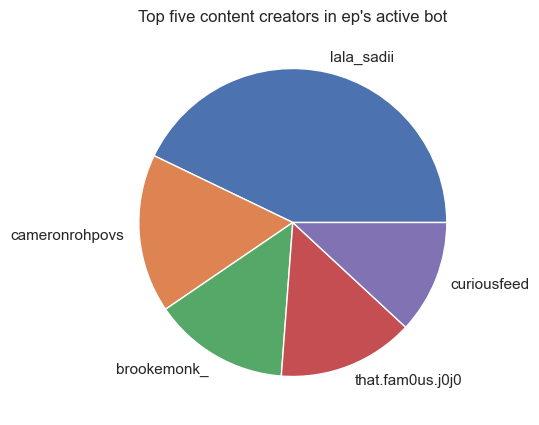

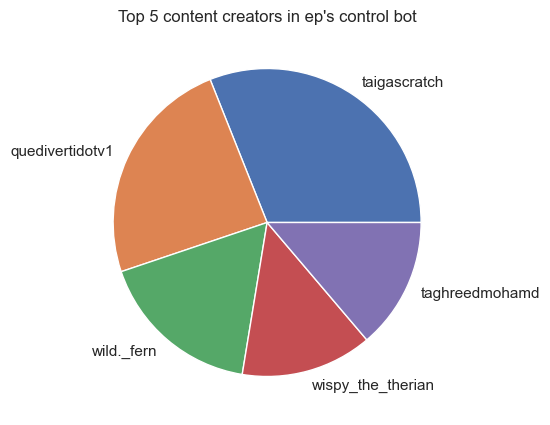

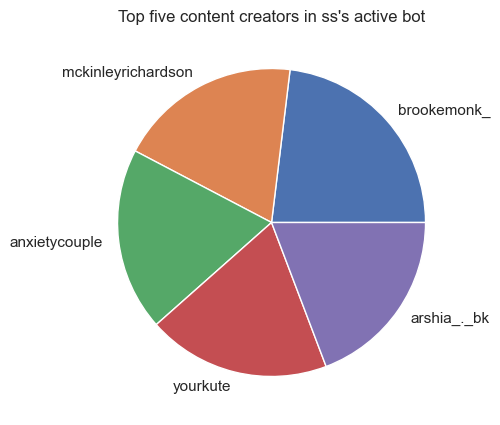

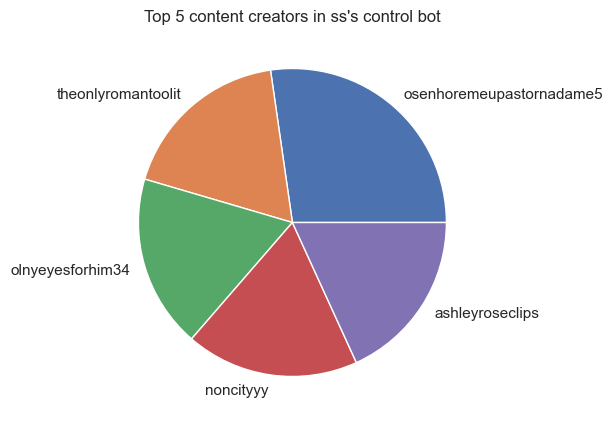

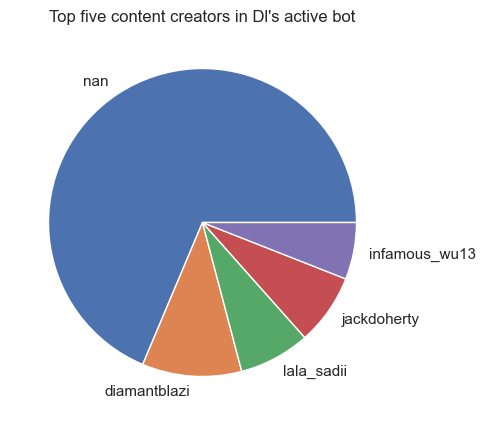

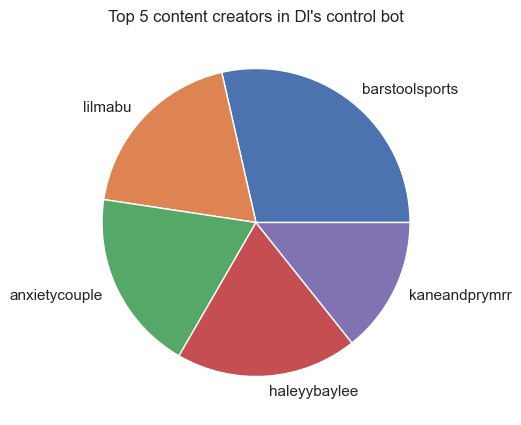

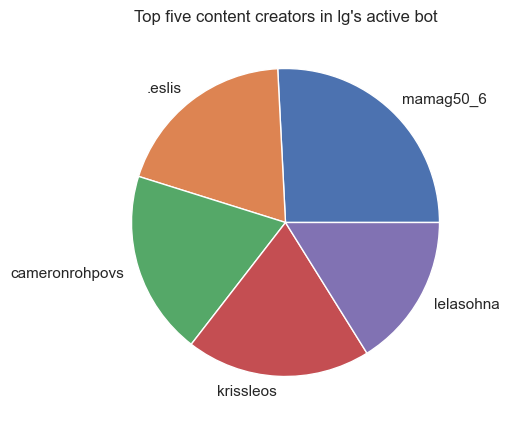

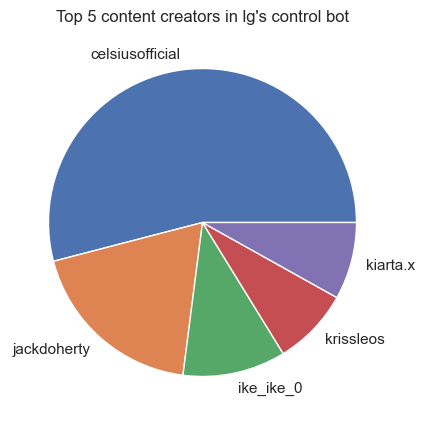

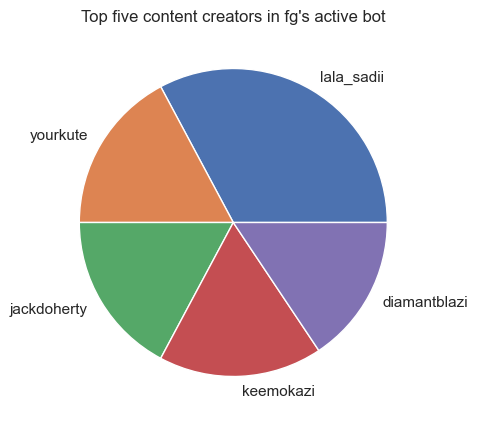

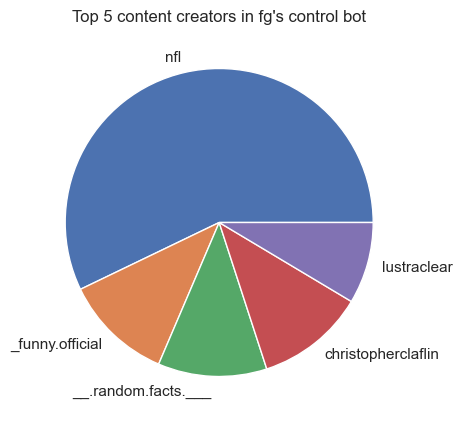

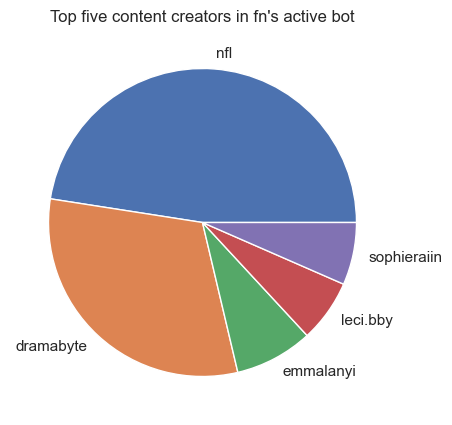

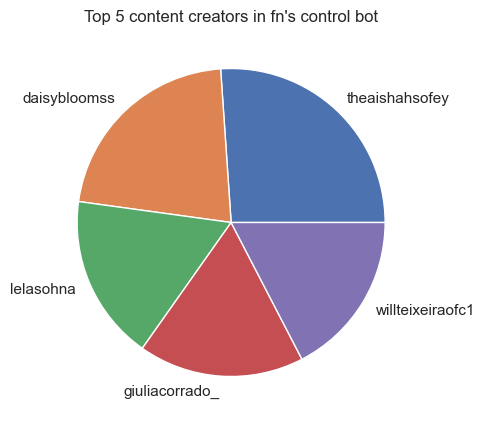

In [41]:
get_top_5(df)